PACKAGES

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
from tqdm import tqdm
import itertools

from cleantext import clean
import nltk
from nltk.tokenize import word_tokenize 
from nltk.tokenize import sent_tokenize 
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('stopwords')
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import *

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\marku\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\marku\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


CLEANING, TOKENIZING, STOPWORDS AND STEMMING

In [7]:
####################################### CLEANING ######################################
def cleaningTime(x):
    if isinstance(x, str):
        clean_text = x.replace('|', '')
        clean_text = clean_text.replace('+', '')
        clean_text = clean_text.replace('$', '')
        
        regex = r'\b[xX]+\b' # remove all strings of x's and X's
        regex2 = r'[=]+'
        clean_text = re.sub(regex, '', clean_text)
        clean_text = re.sub(regex2, '', clean_text)
        clean_text = re.sub('<', ' ', clean_text)
        clean_text = re.sub('>', ' ', clean_text)
        
        clean_text = re.sub(r'\d{1,2}\/\d{1,2}\/\d{2,4}', '<DATE>', clean_text)
        
        clean_text = clean(clean_text,
            no_punct=True,
            lower=True,                    # lowercase text
            no_line_breaks=True,           # fully strip line breaks as opposed to only normalizing them
            no_urls=True,                  # replace all URLs with a special token
            no_emails=True,                # replace all email addresses with a special token
            no_numbers=True,
            replace_with_url="<URL>",
            replace_with_email="<EMAIL>",
            replace_with_number="<NUMBER>",
            )
        clean_text = re.sub(r"[^a-zA-Z0-9]+", ' ', clean_text) # remove all non-alphanumeric characters
        return clean_text
    else:
        return ''

####################################### TOKENIZE #########################################
def Tokenize(x):     
    tokens = nltk.word_tokenize(x)
    return tokens

######################################## REMOVING STOPWORDS ################################
stop_words = set(stopwords.words('english'))

# removing
def Remove_stopwords(x): 
    filtered_sentence = []
    for w in x:
        if w not in stop_words:
            filtered_sentence.append(w)
    return filtered_sentence

######################################### STEMMING ##########################################
stemmer = SnowballStemmer("english")

def Stemming_Words(x):
    stem_words = []
    for w in x:
        word = stemmer.stem(w)
        stem_words.append(word)
    return stem_words

######################################## COUNTING WORDS #####################################
def unique_words (file):
    UN = {}
    for row in file:
        for word in row:
            if word not in UN:
                UN[word] = 1
            else: 
                UN[word] += 1
    UN = dict(sorted(UN.items(), key = lambda kv: kv[1], reverse=True)) # Sorting the unique words after number of occurrences, from highest to lowest
    return UN

CLEANING FAKENEWSCORPUS SAMPLE

In [8]:
R = pd.read_csv("https://raw.githubusercontent.com/several27/FakeNewsCorpus/master/news_sample.csv") 
Copy_clean = R.copy() 

Copy_clean['content'] = R['content'].apply(cleaningTime)

Copy_tok = Copy_clean.copy()
Copy_tok['content'] = Copy_tok['content'].apply(Tokenize)
#print(Copy_tok['content'])

Copy_stop = Copy_tok.copy()
Copy_stop['content'] = Copy_stop['content'].apply(Remove_stopwords)

Copy_stemming = Copy_stop.copy()
Copy_stemming['content'] = Copy_stemming['content'].apply(Stemming_Words)

# number of unique words after...
print("Number of unique words after tokenization: ", len(unique_words(Copy_tok['content'])))
print("Number of unique words after removing stopwords: ", len(unique_words(Copy_stop['content'])))
print("Number of unique words after stemming: ", len(unique_words(Copy_stemming['content'])))

# reductionrates
print("Reduction of UW from tokenization to after removing stopwords (in %): ", 100 - (len(unique_words(Copy_stop['content']))/len(unique_words(Copy_tok['content'])))*100)
print("Reduction of UW from stopwords to after stemming (in %): ", 100 - (len(unique_words(Copy_stemming['content']))/len(unique_words(Copy_stop['content'])))*100)

Number of unique words after tokenization:  16589
Number of unique words after removing stopwords:  16457
Number of unique words after stemming:  10936
Reduction of UW from tokenization to after removing stopwords (in %):  0.7957079992766296
Reduction of UW from stopwords to after stemming (in %):  33.54803427113082


PLOTS/COUNTS

{'number': 2453, 'url': 243, 'email': 104, 'date': 27}
{'number': 2453, 'one': 463, 'us': 445, 'like': 406, 'time': 393, 'peopl': 387, 'state': 366, 'trump': 348, 'use': 322, 'would': 321, 'market': 296, 'year': 293, 'also': 276, 'new': 270, 'blockchain': 260, 'make': 258, 'url': 243, 'think': 234, 'thing': 233, 'said': 232, 'report': 232, 'go': 232, 'way': 228, 'mani': 227, 'govern': 225, 'even': 216, 'nation': 213, 'take': 212, 'next': 212, 'get': 211, 'see': 203, 'presid': 202, 'could': 201, 'work': 191, 'say': 191, 'stock': 188, 'american': 186, 'two': 185, 'world': 184, 'may': 184, 'need': 183, 'first': 183, 'day': 182, 'right': 181, 'life': 177, 'power': 171, 'want': 169, 'look': 164, 'help': 157, 'come': 156, 'countri': 154, 'well': 154, 'includ': 152, 'bitcoin': 151, 'feel': 151, 'fact': 149, 'person': 148, 'war': 147, 'bank': 146, 'obama': 146, 'good': 144, 'search': 143, 'back': 142, 'headlin': 142, 'sourc': 142, 'much': 142, 'call': 137, 'part': 134, 'support': 134, 'exceed'

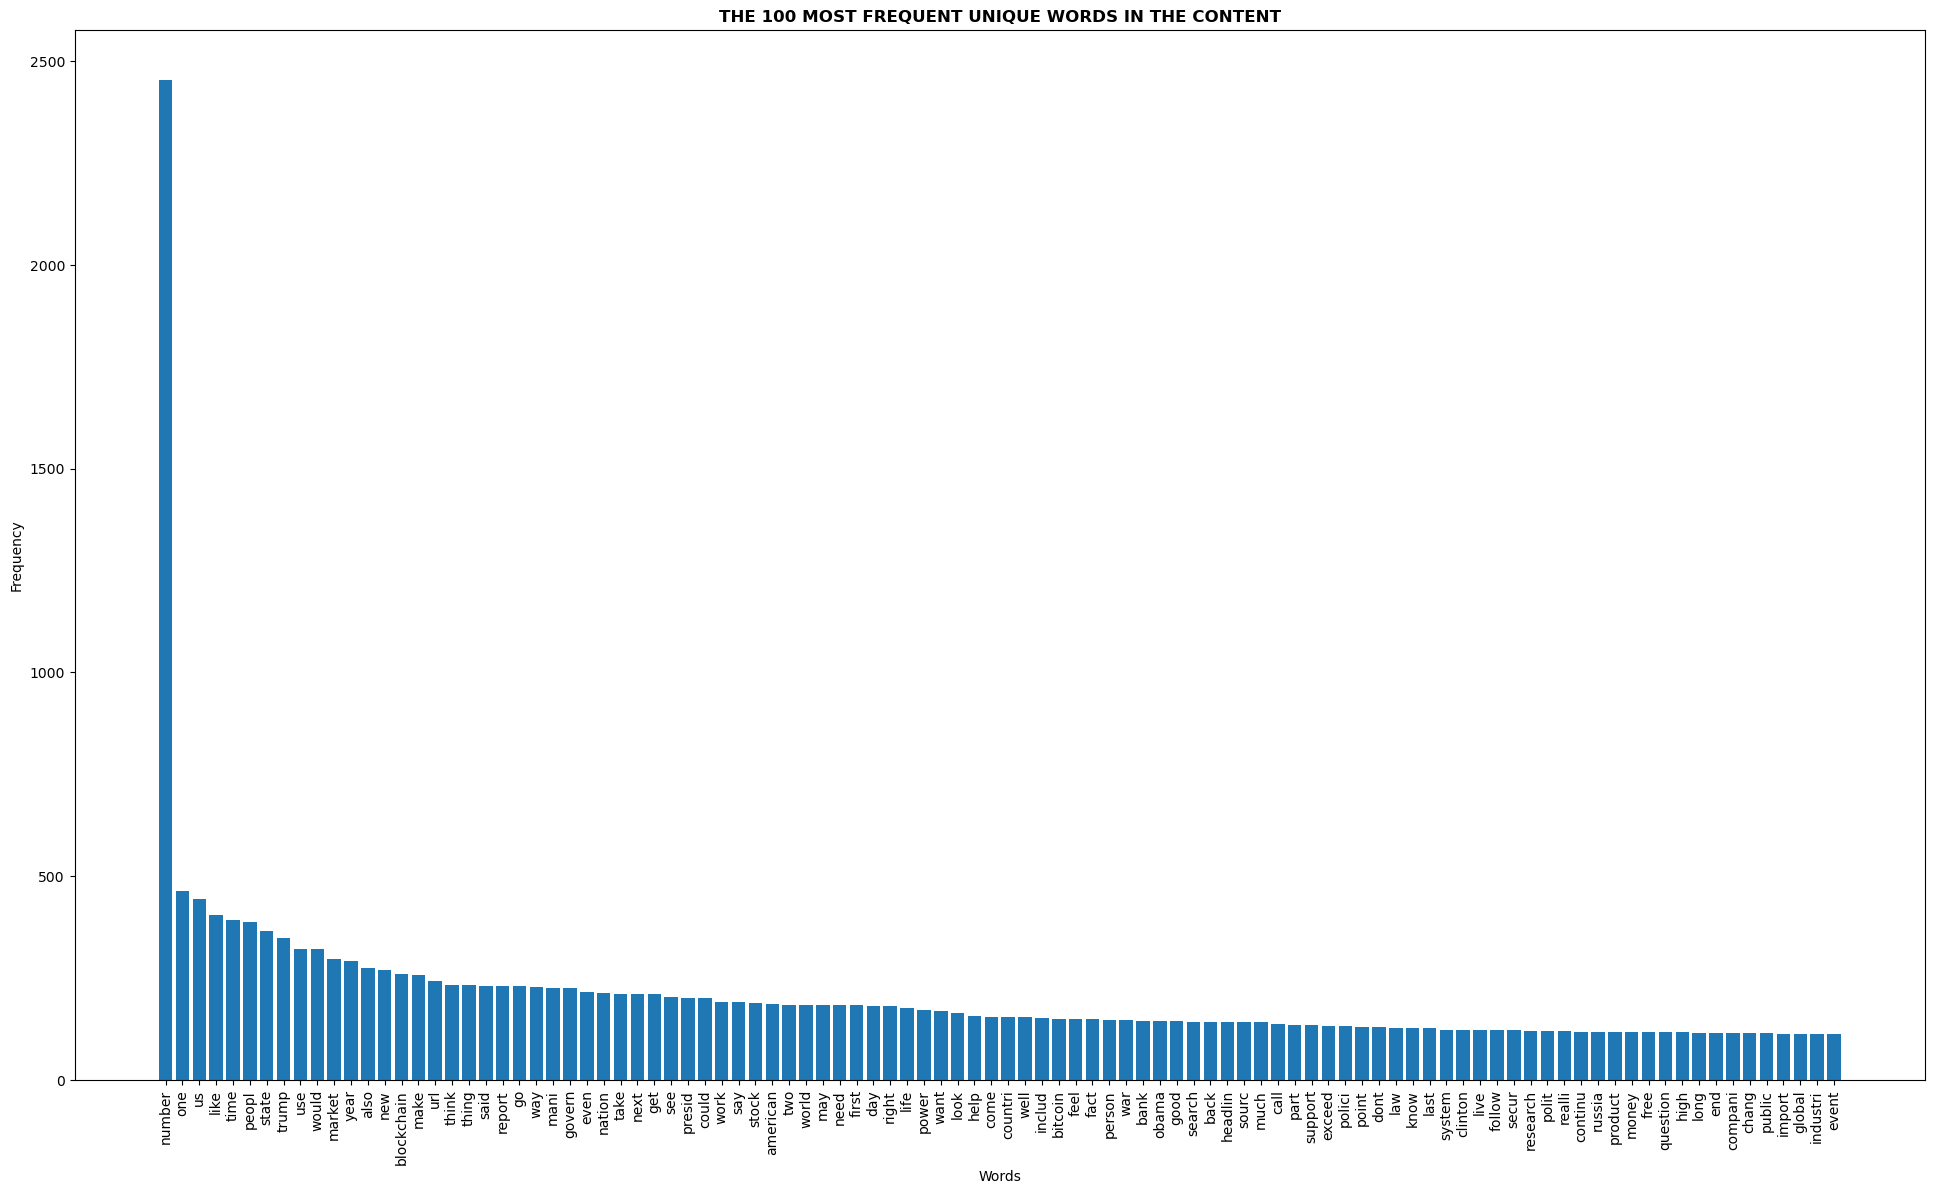

{'one': 463, 'us': 445, 'like': 406, 'time': 393, 'peopl': 387, 'state': 366, 'trump': 348, 'use': 322, 'would': 321, 'market': 296, 'year': 293, 'also': 276, 'new': 270, 'blockchain': 260, 'make': 258, 'url': 243, 'think': 234, 'thing': 233, 'said': 232, 'report': 232, 'go': 232, 'way': 228, 'mani': 227, 'govern': 225, 'even': 216, 'nation': 213, 'take': 212, 'next': 212, 'get': 211, 'see': 203, 'presid': 202, 'could': 201, 'work': 191, 'say': 191, 'stock': 188, 'american': 186, 'two': 185, 'world': 184, 'may': 184, 'need': 183, 'first': 183, 'day': 182, 'right': 181, 'life': 177, 'power': 171, 'want': 169, 'look': 164, 'help': 157, 'come': 156, 'countri': 154, 'well': 154, 'includ': 152, 'bitcoin': 151, 'feel': 151, 'fact': 149, 'person': 148, 'war': 147, 'bank': 146, 'obama': 146, 'good': 144, 'search': 143, 'back': 142, 'headlin': 142, 'sourc': 142, 'much': 142, 'call': 137, 'part': 134, 'support': 134, 'exceed': 133, 'polici': 132, 'point': 130, 'dont': 130, 'law': 129, 'know': 12

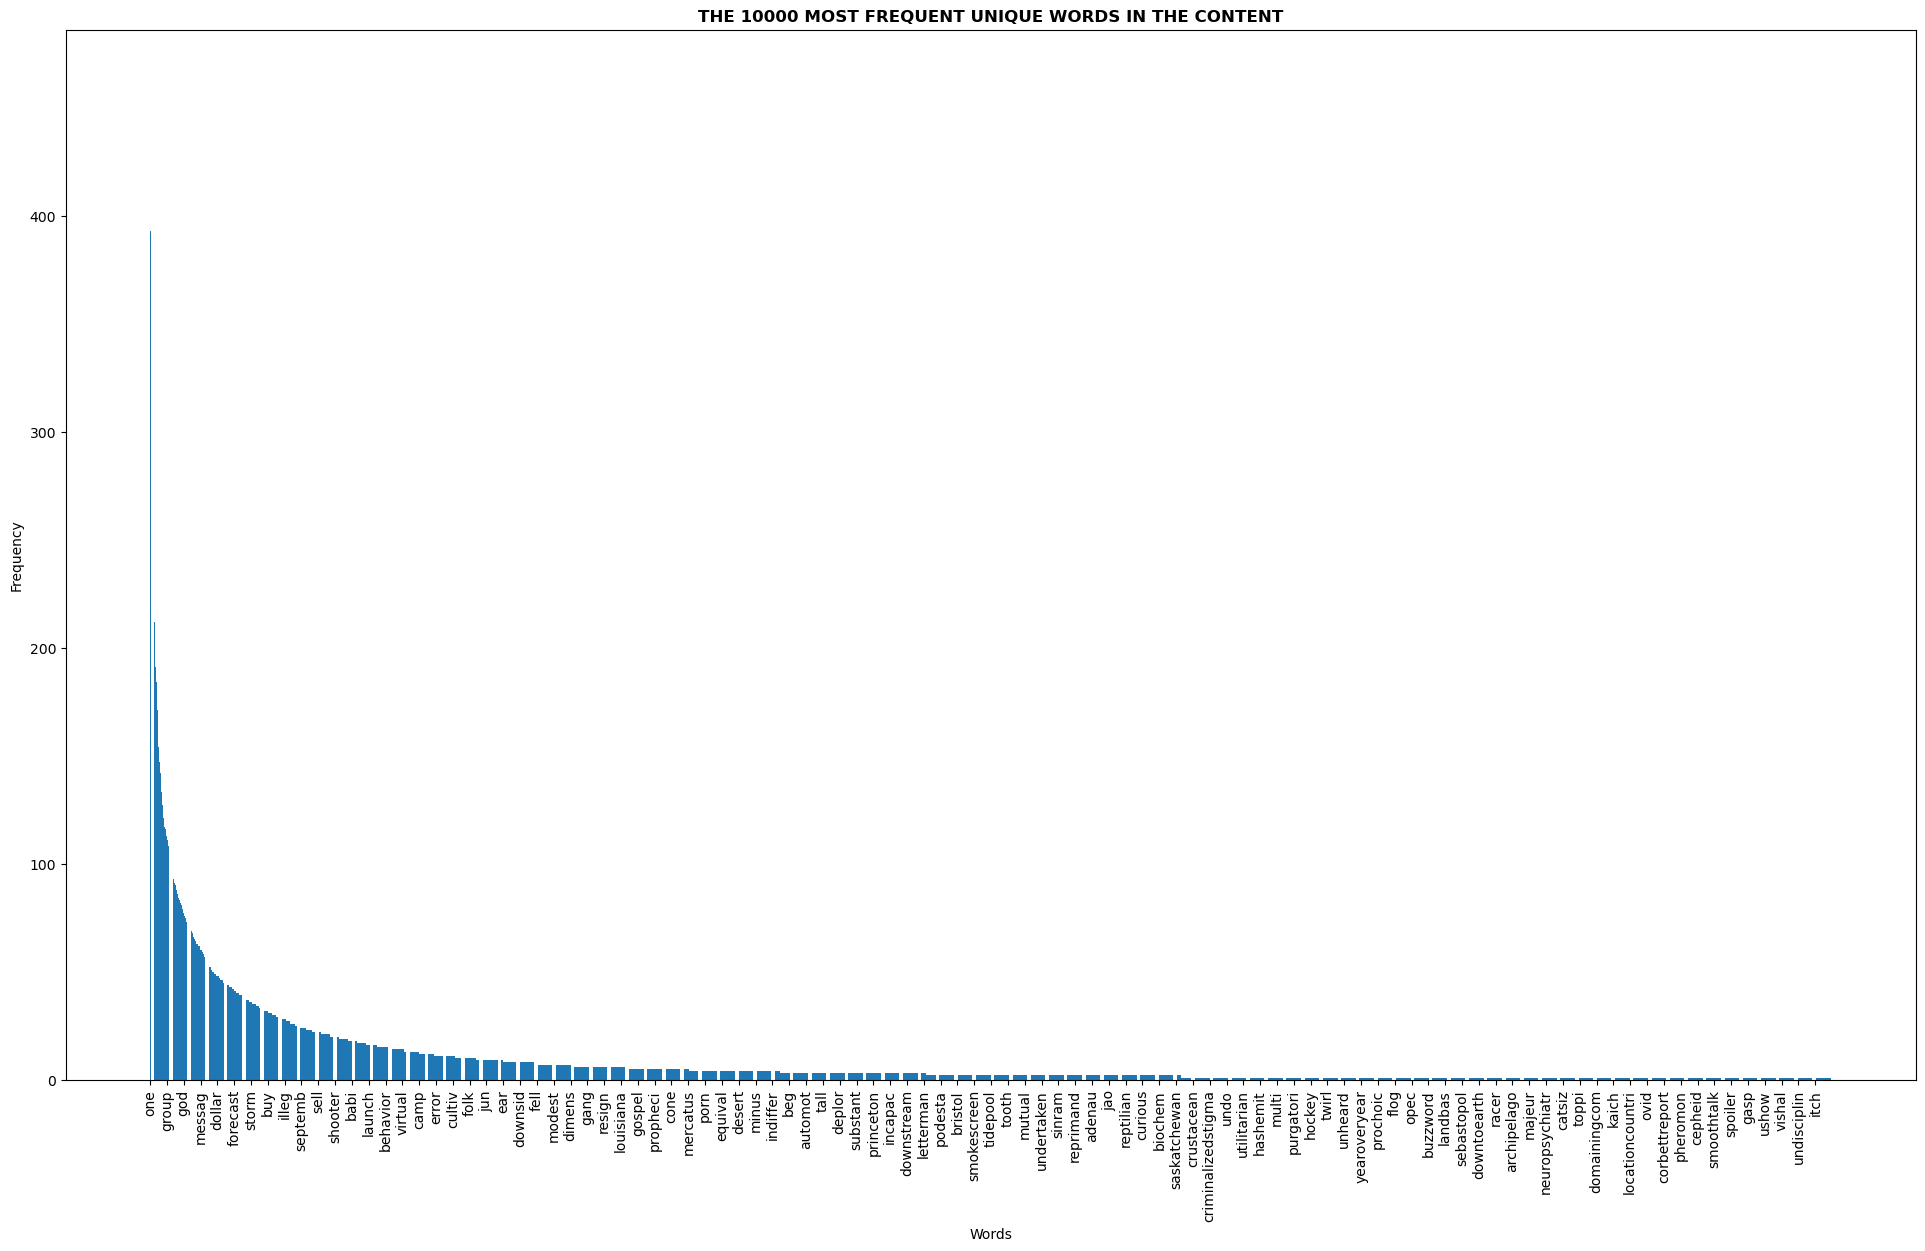

In [9]:
# COUNTING
count = 0 
wordlist = ['url', 'number', 'email', 'date']
D = {}
for i in Copy_stemming['content']:
    for x in i:
        if x in wordlist and x not in D:
            D[x] = 1
        elif x in wordlist and x in D:
            D[x] += 1
        else:
            None            
print(D)

# THE 100 MOST FREQUENT WORDS IN CONTENT
UW_stemming = unique_words(Copy_stemming['content'])
the_hundred = dict(itertools.islice(UW_stemming.items(), 100))
print(the_hundred)

# PLOT
fig = plt.figure()
ax = fig.add_axes([0,0,1,1]) 
words = the_hundred.keys() 
count = the_hundred.values()
ax.bar(words,count)
ax.set_title('THE 100 MOST FREQUENT UNIQUE WORDS IN THE CONTENT', fontsize=12, fontweight='bold') # title
ax.set_xlabel('Words') # x-axis label
ax.set_ylabel('Frequency') # y-axis label
plt.xticks(rotation= 'vertical')
fig.set_size_inches(18.5, 10.5) # size of the plot
plt.show()

# THE 10000 MOST FREQUENT WORDS IN CONTENT
the_tenthousand = dict(itertools.islice(UW_stemming.items(), 10000))
del the_tenthousand['number'] # deleting the word 'number' from the dictionary
print(the_tenthousand)

# PLOT
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
words = the_tenthousand.keys()
count = the_tenthousand.values()
ax.bar(words,count)
ax.set_title('THE 10000 MOST FREQUENT UNIQUE WORDS IN THE CONTENT', fontsize=12, fontweight='bold') # title
ax.set_xlabel('Words') # x-axis label
ax.set_ylabel('Frequency') # y-axis label
plt.xticks(range(0, 10000, 100), list(the_tenthousand.keys())[::100], rotation='vertical') # x-axis labels every 100 words
fig.set_size_inches(18.5, 10.5) # size of the plot
plt.show()

LOADING 2 MILLION ARTICLES INTO A CSV FILE

In [10]:
# Read the first 2000000 rows in chunks of 10000, and write to a csv file called 2mio-raw.csv. Include progress bar (tqdm).
chunksize = 10000
filename = 'news_cleaned_2018_02_13.csv'
output_file = '2mio-raw.csv'

tqdm.pandas()

for i, chunk in enumerate(pd.read_csv(filename, chunksize=chunksize, lineterminator='\n')):
    try:
        print('Processing chunk', i+1)
        if i == 0:
            chunk.to_csv(output_file, index=False)
        else:
            chunk.to_csv(output_file, index=False, header=False, mode='a')
        if chunksize*(i+1) >= 2000000:
            break

    except:
        print('Error in chunk', i+1)
        pass

    tqdm.write(f"{chunksize*(i+1)} rows processed. The total number of articles remaining is {2000000 - chunksize*(i+1)}")

Processing chunk 1
10000 rows processed. The total number of articles remaining is 1990000
Processing chunk 2
20000 rows processed. The total number of articles remaining is 1980000
Processing chunk 3
30000 rows processed. The total number of articles remaining is 1970000
Processing chunk 4
40000 rows processed. The total number of articles remaining is 1960000
Processing chunk 5
50000 rows processed. The total number of articles remaining is 1950000
Processing chunk 6
60000 rows processed. The total number of articles remaining is 1940000
Processing chunk 7
70000 rows processed. The total number of articles remaining is 1930000
Processing chunk 8
80000 rows processed. The total number of articles remaining is 1920000
Processing chunk 9
90000 rows processed. The total number of articles remaining is 1910000
Processing chunk 10
100000 rows processed. The total number of articles remaining is 1900000
Processing chunk 11
110000 rows processed. The total number of articles remaining is 189

APPLYING CLEANING, TOKENIZING, STOPWORDS AND STEMMING TO 2 MILLION ARTICLES

In [12]:
chunksize = 10000
filename = '2mio-raw.csv'
output_file = 'df_clean_tok_stop_stem.csv'

tqdm.pandas()

for i, chunk in enumerate(pd.read_csv(filename, chunksize=chunksize)):
    print('Processing chunk', i+1)
    chunk['content'] = chunk['content'].apply(cleaningTime).apply(Tokenize).apply(Remove_stopwords).apply(Stemming_Words)
    if i == 0:
        chunk.to_csv(output_file, index=False)
    else:
        chunk.to_csv(output_file, index=False, header=False, mode='a')
    
    tqdm.write(f"{chunksize*(i+1)} rows processed. The total number of articles remaining is {2000000 - chunksize*(i+1)}")

Processing chunk 1
10000 rows processed. The total number of articles remaining is 1990000
Processing chunk 2
20000 rows processed. The total number of articles remaining is 1980000
Processing chunk 3
30000 rows processed. The total number of articles remaining is 1970000
Processing chunk 4
40000 rows processed. The total number of articles remaining is 1960000
Processing chunk 5
50000 rows processed. The total number of articles remaining is 1950000
Processing chunk 6
60000 rows processed. The total number of articles remaining is 1940000
Processing chunk 7
70000 rows processed. The total number of articles remaining is 1930000
Processing chunk 8
80000 rows processed. The total number of articles remaining is 1920000
Processing chunk 9
90000 rows processed. The total number of articles remaining is 1910000
Processing chunk 10
100000 rows processed. The total number of articles remaining is 1900000
Processing chunk 11
110000 rows processed. The total number of articles remaining is 189

LOAD THE 2 MILLION ARTICLES INTO A PANDAS DATAFRAME

In [13]:
df = pd.read_csv('df_clean_tok_stop_stem.csv', usecols=['content', 'type', 'title'])
df

C:\Users\marku\AppData\Local\Temp\ipykernel_4872\2464543508.py:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('df_clean_tok_stop_stem.csv', usecols=['content', 'type', 'title'])


,type,content,title
0,rumor,"['life', 'illus', 'least', 'quantum', 'level',...",Is life an ILLUSION? Researchers prove 'realit...
1,hate,"['unfortun', 'hasnt', 'yet', 'attack', 'islam'...",Donald Trump
2,hate,"['los', 'angel', 'polic', 'depart', 'deni', 'n...",Donald Trump
3,hate,"['white', 'hous', 'decid', 'quiet', 'withdraw'...","MORE WINNING! Israeli intelligence source, DEB..."
4,hate,"['time', 'come', 'cut', 'tongu', 'support', 'p...","“Oh, Trump, you coward, you just wait, we will..."
...,...,...,...
1999995,unknown,"['emili', 'keeler', 'found', 'curat', 'million...",Emily Keeler
1999996,unknown,"['new', 'inquiri', 'new', 'inquiri', 'space', ...",Chloe Wyma
1999997,bias,"['eric', 'london', 'wide', 'rang', 'nomin', 'l...",Defend Democracy Press
1999998,unknown,"['given', 'choic', 'white', 'black', 'could', ...","In a Mirror, Darkly"


MORE PREPROCESSING ON THE DATAFRAME

In [14]:
# Remove articles with missing 'type' values
df = df[df['type'].notna()]

# Remove articles with 'type' values = 'unknown'
df = df[df['type'] != 'unknown']

# Print number of duplicates
print("Number of duplicates: ", df.duplicated(subset=['title', 'content']).sum())

# Remove duplicate articles based on 'title' and 'content' columns
df.drop_duplicates(subset=['title', 'content'], inplace=True)

# Print sum of articles for all types
print("Total # of articles: ", df['type'].value_counts().sum())

# Make a new column 'label' and assign 1 to all rows with 'type' = 'fake' or 'conspiracy' or 'junksci' or 'hate' or 'unreliable' or 'rumor' and 0 to all other rows
df['label'] = df['type'].apply(lambda x: 1 if x in ['fake', 'conspiracy', 'junksci', 'hate', 'unreliable', 'rumor'] else 0)

Number of duplicates:  196910
Total # of articles:  1551227


TRAIN, TEST AND VALIDATION SPLIT

In [15]:
# Assign X and y
X = df['content']
y = df['label']

# Split into train test and validation with 80 10 10 split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=0)

TD-IDF VECTORIZER

In [17]:
# Use TF-IDF to transform the data
tfidf_transformer = TfidfVectorizer()

# Fit the transformer on the training set
X_train_tfidf = tfidf_transformer.fit_transform(X_train)

# Fit the transformer on the validation set
X_val_tfidf = tfidf_transformer.transform(X_val)

# Fit the transformer on the test set
X_test_tfidf = tfidf_transformer.transform(X_test)

<h2> Models (baseline)

LOGISTIC REGRESSION

In [19]:
# Train a logistic regression model on the training set
LogRegFinal = LogisticRegression(random_state=0, solver='lbfgs', max_iter=2000)

# Fit the model on the training set
LogRegFinal.fit(X_train_tfidf, y_train)

# Predict the labels of the validation set
y_pred = LogRegFinal.predict(X_val_tfidf)

# Print the accuracy score
print("Accuracy score (logistic): ", accuracy_score(y_val, y_pred))

# Print the classification report
classification_report(y_val, y_pred)
print("Classification report (logistic): ", classification_report(y_val, y_pred))

Accuracy score (logistic):  0.9017618277109133
Classification report (logistic):                precision    recall  f1-score   support

           0       0.88      0.93      0.91     79839
           1       0.92      0.87      0.90     75284

    accuracy                           0.90    155123
   macro avg       0.90      0.90      0.90    155123
weighted avg       0.90      0.90      0.90    155123



LOGISTIC REGRESSION (test set)

In [20]:
# Predict the labels of the test set
y_pred = LogRegFinal.predict(X_test_tfidf)

# Print the accuracy score
print("Accuracy score (logistic test set): ", accuracy_score(y_test, y_pred))

# Print the classification report
classification_report(y_test, y_pred)
print("Classification report (logistic test set): ", classification_report(y_test, y_pred))

Accuracy score (logistic test set):  0.9037151163915087
Classification report (logistic test set):                precision    recall  f1-score   support

           0       0.89      0.93      0.91     80249
           1       0.92      0.87      0.90     74874

    accuracy                           0.90    155123
   macro avg       0.91      0.90      0.90    155123
weighted avg       0.90      0.90      0.90    155123



CONFUSION MATRIX (Logistic Regression)

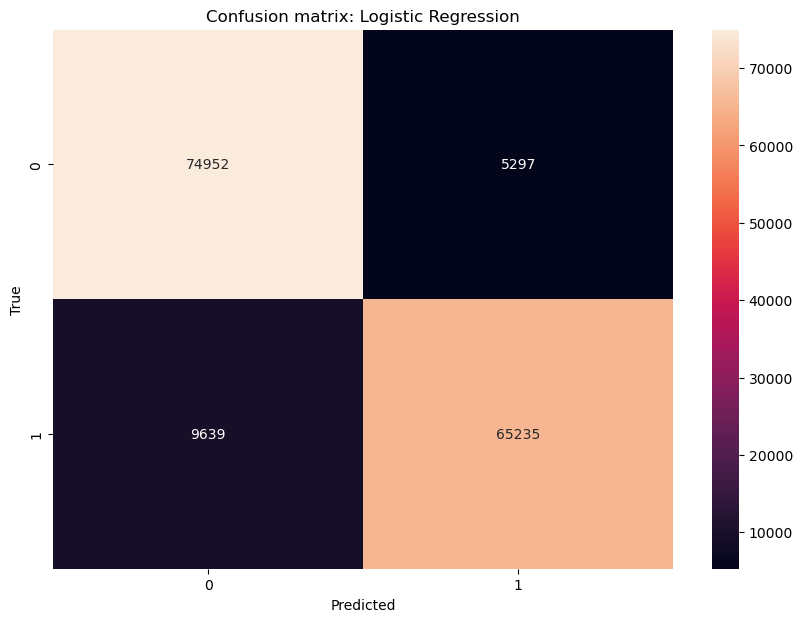

In [21]:
# Plot confusion matrix for logistic regression model on test set
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Confusion matrix: Logistic Regression')
plt.ylabel('True')
plt.xlabel('Predicted')
plt.show()

NAIVE BAYES CLASSIFIER

In [22]:
# Train a multinomial naive bayes model on the training set
clf = MultinomialNB().fit(X_train_tfidf, y_train)

# Predict the labels for the validation set
predicted = clf.predict(X_val_tfidf)

# Calculate the accuracy of the model
accuracy_score(y_val, predicted)
print("Accuracy (naive bayes): ", accuracy_score(y_val, predicted))

# Print the classification report
classification_report(y_val, predicted)
print("Classification report (naive bayes): ", classification_report(y_val, predicted))

Accuracy (naive bayes):  0.8096284883608491
Classification report (naive bayes):                precision    recall  f1-score   support

           0       0.74      0.96      0.84     79839
           1       0.94      0.65      0.77     75284

    accuracy                           0.81    155123
   macro avg       0.84      0.81      0.80    155123
weighted avg       0.84      0.81      0.80    155123



NAIVE BAYES CLASSIFIER (test set)

In [23]:
# Predict the labels for the test set
predicted = clf.predict(X_test_tfidf)

# Calculate the accuracy of the model
accuracy_score(y_test, predicted)
print("Accuracy (naive bayes test set): ", accuracy_score(y_test, predicted))

# Print the classification report
classification_report(y_test, predicted)
print("Classification report (naive bayes test set): ", classification_report(y_test, predicted))

Accuracy (naive bayes test set):  0.8113754891279823
Classification report (naive bayes test set):                precision    recall  f1-score   support

           0       0.75      0.96      0.84     80249
           1       0.94      0.65      0.77     74874

    accuracy                           0.81    155123
   macro avg       0.84      0.81      0.80    155123
weighted avg       0.84      0.81      0.81    155123



CONFUSION MATRIX (Naive Bayes)

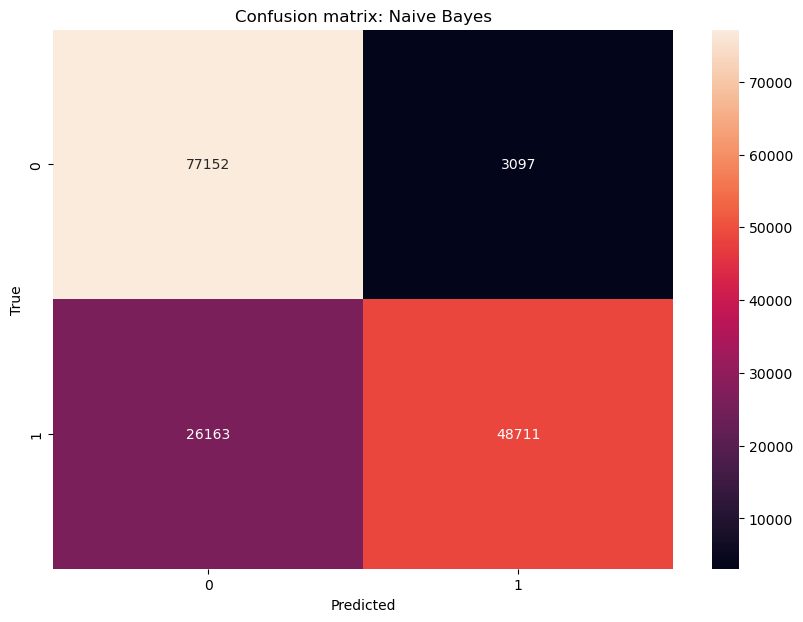

In [24]:
# Plot confusion matrix for naive bayes model on test set
cm = confusion_matrix(y_test, predicted)
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Confusion matrix: Naive Bayes')
plt.ylabel('True')
plt.xlabel('Predicted')
plt.show()

<h3> Models (advanced)

SUPPORT VECTOR MACHINE - Linear Support Vector Classification

In [25]:
# Train a linear support vector machine model on the training set
svm = LinearSVC(random_state=0).fit(X_train_tfidf, y_train)

# Predict the labels for the validation set
predicted = svm.predict(X_val_tfidf)

# Calculate the accuracy of the model
accuracy_score(y_val, predicted)
print("Accuracy (svm): ", accuracy_score(y_val, predicted))

# Print the classification report
classification_report(y_val, predicted)
print("Classification report (svm): ", classification_report(y_val, predicted))

Accuracy (svm):  0.9112059462491056
Classification report (svm):                precision    recall  f1-score   support

           0       0.89      0.94      0.92     79839
           1       0.93      0.88      0.91     75284

    accuracy                           0.91    155123
   macro avg       0.91      0.91      0.91    155123
weighted avg       0.91      0.91      0.91    155123



SUPPORT VECTOR MACHINE - Linear Support Vector Classification (test set)

In [26]:
# Predict the labels of the test set
y_pred = svm.predict(X_test_tfidf)

# Print the accuracy score
print("Accuracy score (svm test set): ", accuracy_score(y_test, y_pred))

# Print the classification report
classification_report(y_test, y_pred)
print("Classification report (svm test set): ", classification_report(y_test, y_pred))

Accuracy score (svm test set):  0.9125597106812013
Classification report (svm test set):                precision    recall  f1-score   support

           0       0.90      0.94      0.92     80249
           1       0.93      0.88      0.91     74874

    accuracy                           0.91    155123
   macro avg       0.91      0.91      0.91    155123
weighted avg       0.91      0.91      0.91    155123



CONFUSION MATRIX (SVM)

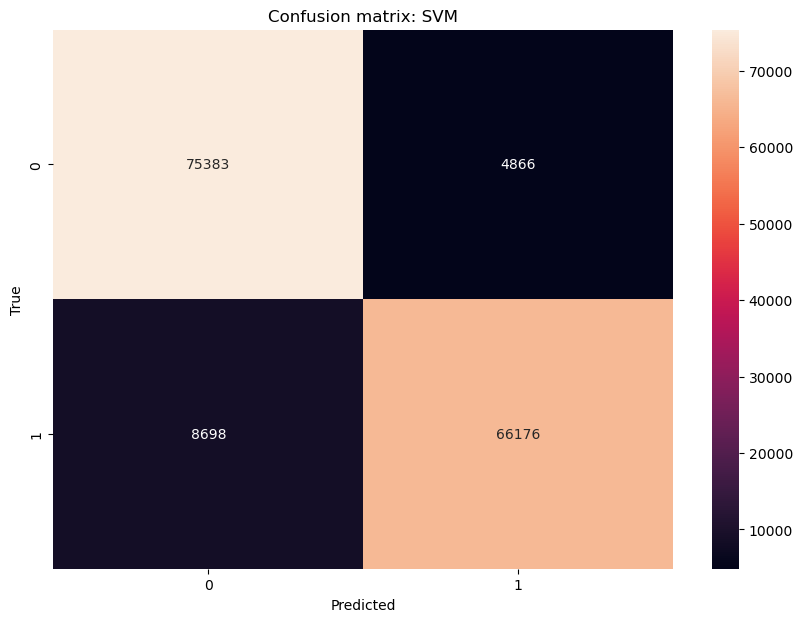

In [27]:
# Plot confusion matrix for svm model on test set
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Confusion matrix: SVM')
plt.ylabel('True')
plt.xlabel('Predicted')
plt.show()

<h3> LIAR Dataset

LOADING LIAR DATASET AND LABEL GROUPING

In [28]:
# Load test.tsv file
dftsv = pd.read_csv('test.tsv', sep='\t', header=None)

# new colomn for the label of the article
dftsv['label'] = dftsv[1].apply(lambda x: 1 if x in ['false', 'pants-fire', 'barely-true'] else 0)

CLEANING, TOKENIZING, STOPWORDS AND STEMMING FOR LIAR DATASET

In [29]:
dftsv[2] = dftsv[2].astype(str)
dftsv[2] = dftsv[2].apply(cleaningTime)
dftsv[2] = dftsv[2].apply(Tokenize)
dftsv[2] = dftsv[2].apply(Remove_stopwords)
dftsv[2] = dftsv[2].apply(Stemming_Words)

VECTORIZE LIAR DATASET

In [30]:
liar_tfidf = tfidf_transformer.transform(dftsv[2].astype(str))

BASELINE MODEL PREDICTIONS

Logistic Regression (LIAR)

In [33]:
# Predict the labels of the test set
y_pred = LogRegFinal.predict(liar_tfidf)

# Print the accuracy score
print("Accuracy score (logistic LIAR): ", accuracy_score(dftsv['label'], y_pred))

# Print the classification report
classification_report(dftsv['label'], y_pred)
print("Classification report (logistic LIAR): ", classification_report(dftsv['label'], y_pred))

Accuracy score (logistic LIAR):  0.5619573796369376
Classification report (logistic LIAR):                precision    recall  f1-score   support

           0       0.57      0.93      0.71       714
           1       0.49      0.08      0.14       553

    accuracy                           0.56      1267
   macro avg       0.53      0.51      0.42      1267
weighted avg       0.53      0.56      0.46      1267



CONFUSION MATRIX (logistic LIAR)

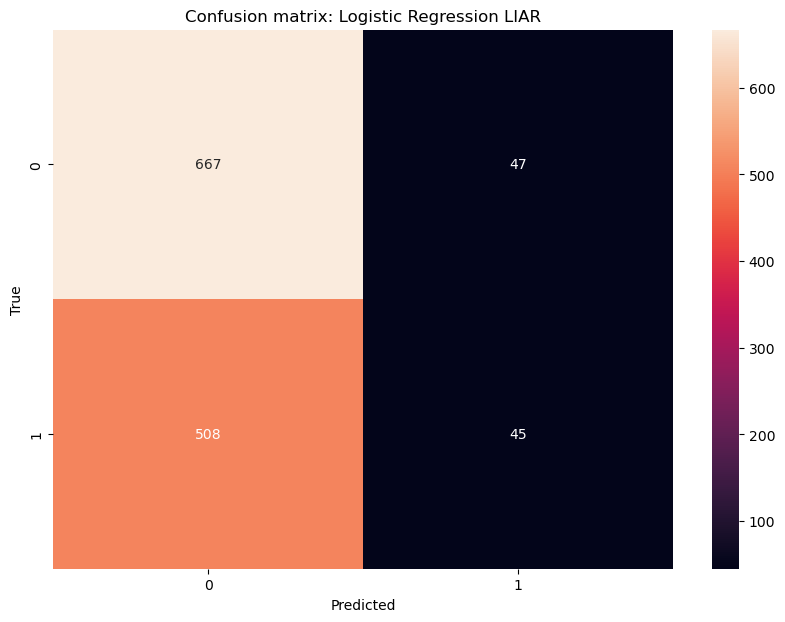

In [34]:
# Plot confusion matrix for logistic regression model on LIAR set
cm = confusion_matrix(dftsv['label'], y_pred)
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Confusion matrix: Logistic Regression LIAR')
plt.ylabel('True')
plt.xlabel('Predicted')
plt.show()

Naive Bayes Classifier (LIAR)

In [35]:
# Predict the labels of the test set
y_pred = clf.predict(liar_tfidf)

# Print the accuracy score
print("Accuracy score (naive bayes LIAR): ", accuracy_score(dftsv['label'], y_pred))

# Print the classification report
classification_report(dftsv['label'], y_pred)
print("Classification report (naive bayes LIAR): ", classification_report(dftsv['label'], y_pred))

Accuracy score (naive bayes LIAR):  0.5595895816890292
Classification report (naive bayes LIAR):                precision    recall  f1-score   support

           0       0.56      0.96      0.71       714
           1       0.45      0.04      0.07       553

    accuracy                           0.56      1267
   macro avg       0.51      0.50      0.39      1267
weighted avg       0.51      0.56      0.43      1267



CONFUSION MATRIX (Naive Bayes Classifier LIAR)

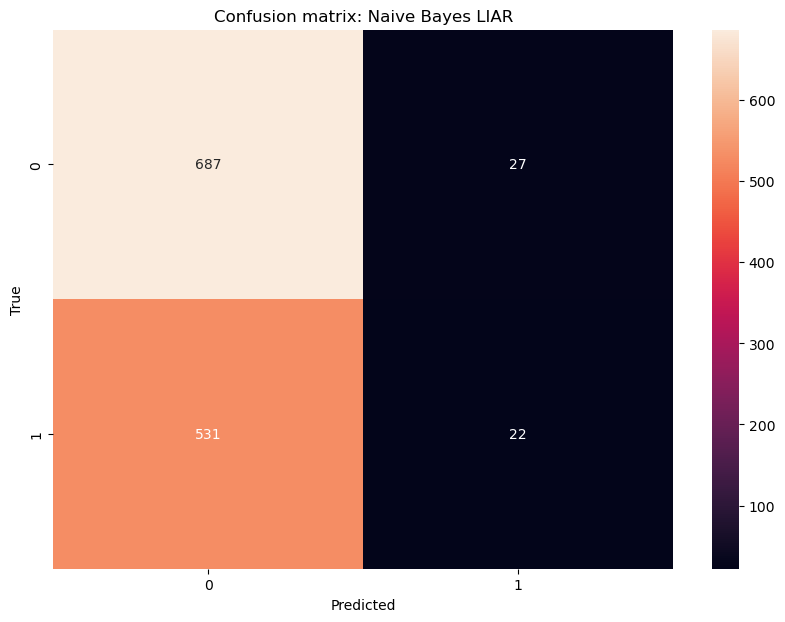

In [36]:
# Plot confusion matrix for naive bayes model on LIAR set
cm = confusion_matrix(dftsv['label'], y_pred)
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Confusion matrix: Naive Bayes LIAR')
plt.ylabel('True')
plt.xlabel('Predicted')
plt.show()

ADVANCED MODEL PREDICTIONS

In [31]:
# Predict the labels of the test set
y_pred = svm.predict(liar_tfidf)

# Print the accuracy score
print("Accuracy score (svm LIAR): ", accuracy_score(dftsv['label'], y_pred))

# Print the classification report
classification_report(dftsv['label'], y_pred)
print("Classification report (svm LIAR): ", classification_report(dftsv['label'], y_pred))

Accuracy score (svm LIAR):  0.5611681136543015
Classification report (svm LIAR):                precision    recall  f1-score   support

           0       0.57      0.94      0.71       714
           1       0.48      0.07      0.12       553

    accuracy                           0.56      1267
   macro avg       0.52      0.51      0.42      1267
weighted avg       0.53      0.56      0.45      1267



CONFUSION MATRIX (svm LIAR)

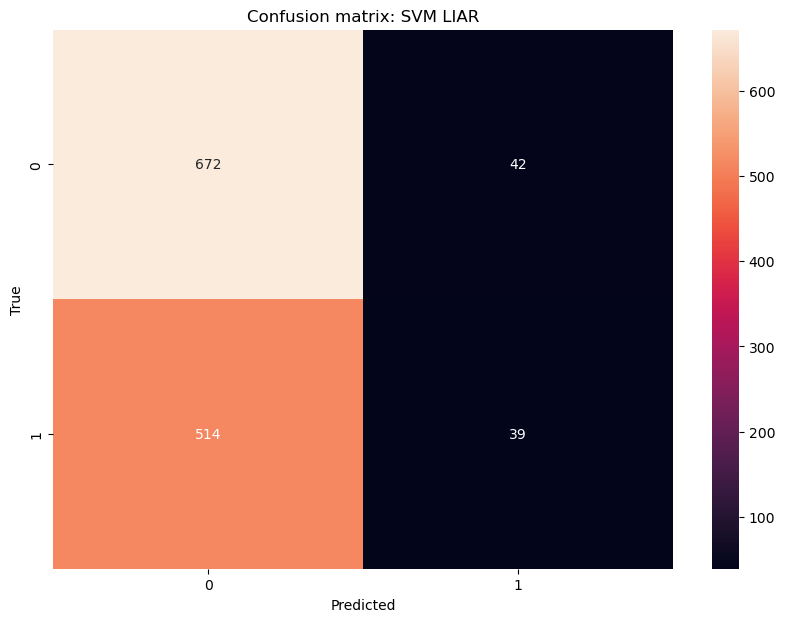

In [32]:
# Plot confusion matrix for svm model on LIAR set
cm = confusion_matrix(dftsv['label'], y_pred)
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Confusion matrix: SVM LIAR')
plt.ylabel('True')
plt.xlabel('Predicted')
plt.show()